
Exercises XP

Last Updated: June 10th, 2025

👩‍🏫 👩🏿‍🏫 What You’ll learn

    How to import and manipulate time-series data using pandas.
    Techniques for handling missing values in time-series data.
    Basic data visualization using matplotlib and seaborn.
    Building and training a simple LSTM model for time-series data analysis.


🛠️ What you will create

    A cleaned and preprocessed time-series dataset.
    Visualizations of the time-series data.
    A simple LSTM model to analyze and predict time-series data.


Dataset

You will use this Dataset : household_power_consumption. You can find a description of the data here.


All “Part 1,” “Part 2,” etc., sections comprise one comprehensive exercise and are meant to be tackled sequentially as a single, continuous task.


Part 1 : Data Import and Initial Exploration

    Import the necessary libraries for data analysis and visualization.
    Load the time-series dataset from the provided file.
    Display the first few rows of the dataset to understand its structure.
    Check the data types of each column and the shape of the dataset.


Part 2 : Handling Missing Values

    Identify columns in the dataset that contain missing values.
    Fill the missing values using the mean of the respective columns.
    Verify that there are no more missing values in the dataset.


Part 3 : Data Visualization

    Resample the ‘Global_active_power’ column over a day and plot the sum and mean values.
    Create a plot showing the mean and standard deviation of the ‘Global_intensity’ column resampled over a day.


Part 4 : Data Preprocessing for LSTM

    Normalize the dataset to prepare it for LSTM model training.
    Split the dataset into training and testing sets.
    Reshape the data to fit the input requirements of an LSTM model.


Part 5 : Building an LSTM Model

    Import the necessary libraries for building an LSTM model.
    Define the architecture of the LSTM model, including the number of layers and neurons.
    Compile the model with an appropriate loss function and optimizer.


Part 6 : Training and Evaluating the LSTM Model

    Train the LSTM model on the training dataset.
    Evaluate the model’s performance on the testing dataset.
    Plot the training and validation loss to assess the model’s learning progress.


Charger les données, observer la structure.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [6]:
# Chargement du fichier brut
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 na_values='?', low_memory=False)

# Fusion Date + Time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')

# Conversion explicite en float
num_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Nettoyage des lignes invalides
df.dropna(subset=['Datetime', 'Global_active_power'], inplace=True)

# Indexation
df.set_index('Datetime', inplace=True)

# Affichage pour contrôle
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB
None
                           Date      Time  Global_active_power  \
Datetime                                                         
2006-12-16 17:24:00  16/12/2006  17:24:00                4.216   
2006-12-16 17:25:00  16/12/2006  17:25:00                5.360   
2006-12-16 17:26:00  16/12/2006  17:26:00                5.374   
2006-12-16 17:27:00  16/12/2006  17:27:00                5.388   
2006

Vérifiez que la colonne Datetime est bien de type datetime64[ns].

Notez les colonnes numériques : Global_active_power, Voltage, etc.

Imputer les valeurs manquantes avec la moyenne.

In [8]:
# Liste des colonnes numériques
numeric_cols = df.select_dtypes(include='number').columns

# Remplissage uniquement sur les colonnes numériques
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Vérification des valeurs manquantes restantes
print("Total de valeurs manquantes après imputation :", df.isna().sum().sum())

print("Colonnes non numériques avec NaN :")
print(df.select_dtypes(exclude='number').isna().sum()[lambda x: x > 0])

Total de valeurs manquantes après imputation : 0
Colonnes non numériques avec NaN :
Series([], dtype: int64)


La stratégie par moyenne est simple et adaptée si les données manquantes sont peu nombreuses et distribuées de manière homogène.

Resample et tracé de la somme et moyenne journalière de Global_active_power.

                 sum      mean
Datetime                      
2006-12-16  1209.176  3.053475
2006-12-17  3390.460  2.354486
2006-12-18  2203.826  1.530435
2006-12-19  1666.194  1.157079
2006-12-20  2225.748  1.545658
2006-12-21  1716.624  1.193758
2006-12-22  2341.338  1.625929
2006-12-23  4773.386  3.314851
2006-12-24  2550.012  1.770842
2006-12-25  2743.120  1.904944
               sum         mean
count  1442.000000  1433.000000
mean   1551.334856     1.092048
std     617.297117     0.420415
min       0.000000     0.173818
25%    1161.198500     0.816776
50%    1534.778000     1.080732
75%    1889.859500     1.323926
max    4773.386000     3.314851


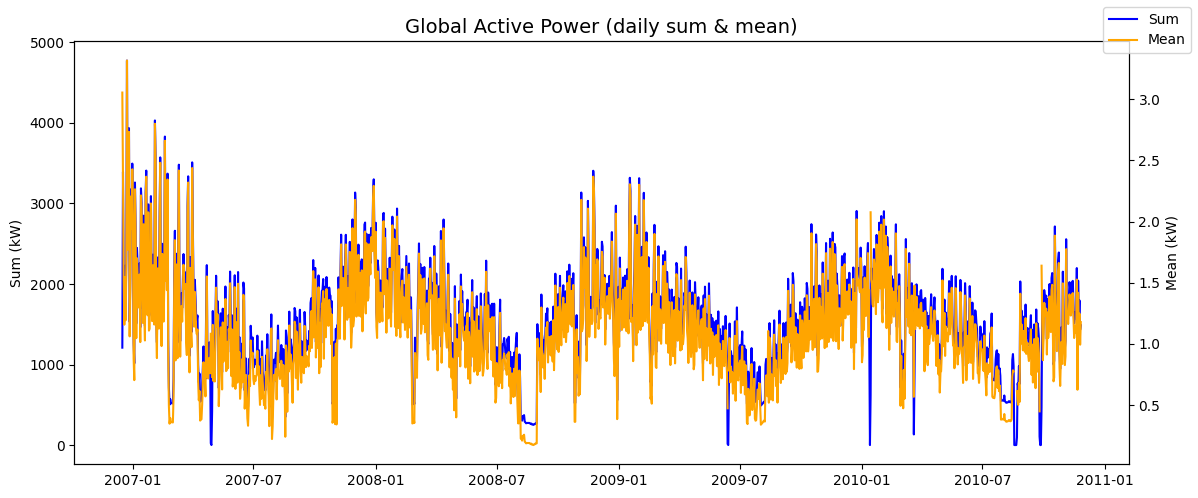

In [12]:
# Resample journalier
daily = df['Global_active_power'].resample('D')
daily_sum = daily.sum()
daily_mean = daily.mean()
daily_df = df['Global_active_power'].resample('D').agg(['sum', 'mean'])

print(daily_df.head(10))
print(daily_df.describe())
# Visualisation
daily_stats = df['Global_active_power'].resample('D').agg(['sum', 'mean'])
fig, ax1 = plt.subplots(figsize=(12, 5))

# Axe pour SUM
ax1.plot(daily_stats.index, daily_stats['sum'], label='Sum', color='blue')
ax1.set_ylabel('Sum (kW)')
ax1.set_title('Global Active Power (daily sum & mean)', fontsize=14)

# Axe pour MEAN
ax2 = ax1.twinx()
ax2.plot(daily_stats.index, daily_stats['mean'], label='Mean', color='orange')
ax2.set_ylabel('Mean (kW)')

# Légendes
fig.legend(loc="upper right")
plt.tight_layout()
plt.show()

Moyenne et écart-type journaliers de Global_intensity.

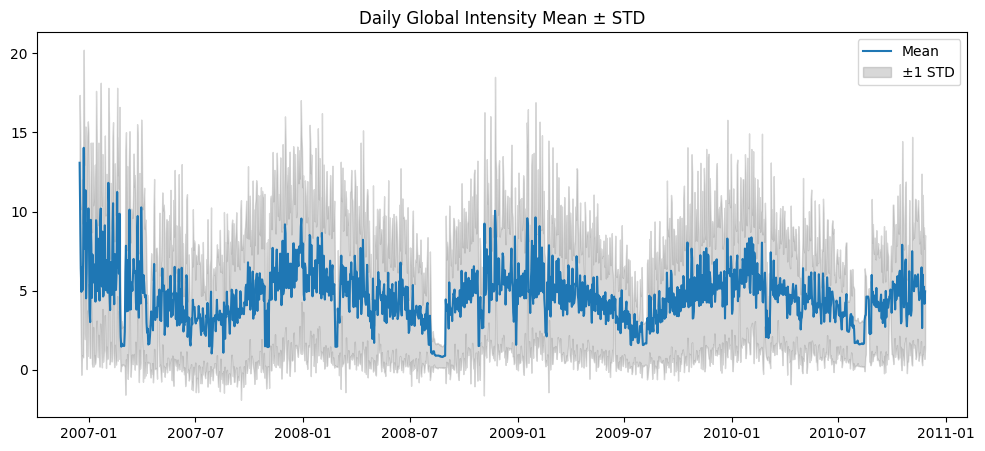

In [11]:
gi = df['Global_intensity'].resample('D')
gi_mean = gi.mean()
gi_std = gi.std()

plt.figure(figsize=(12, 5))
plt.plot(gi_mean, label='Mean')
plt.fill_between(gi_mean.index, gi_mean - gi_std, gi_mean + gi_std,
                 color='gray', alpha=0.3, label='±1 STD')
plt.legend()
plt.title('Daily Global Intensity Mean ± STD')
plt.show()

Comparez variations saisonnières ou pics.

L’écart-type met en évidence les jours avec fluctuations plus fortes.

Normaliser, découper et remodeler les données.

In [13]:
cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[cols])

# Séquence pour LSTM : exemple de fenêtre glissante
def create_sequences(X, y, time_steps=24):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X, y = create_sequences(scaled, scaled[:, 0], time_steps=24)

# Séparation train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1639404, 24, 4) (1639404,)
Test shape: (409852, 24, 4) (409852,)


time_steps=24 = 24 heures. Vous pouvez ajuster selon granularité souhaitée.

X en forme (échantillons, 24, features), conforme LSTM.

Définir l’architecture et compiler.

In [14]:
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(25, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 50)            11000     
                                                                 
 dropout (Dropout)           (None, 24, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                7600      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 18,626
Trainable params: 18,626
Non-trainable params: 0
_________________________________________________________________


Deux couches LSTM + Dropout pour réduire le surapprentissage.

La sortie est une valeur continue (MSE approprié).

Entraîner, évaluer le modèle, tracer les courbes.

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_split=0.2, verbose=1)

# Évaluation
loss = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", loss)

# Tracé des courbes de perte
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

Rmse MAE

In [16]:
# Prédictions
y_pred = model.predict(X_test)

# Inversion de la normalisation pour y_test et y_pred
def invert_scale(y_scaled, scaler, column_index=0):
    dummy = np.zeros((len(y_scaled), scaler.n_features_in_))
    dummy[:, column_index] = y_scaled.ravel()
    inverted = scaler.inverse_transform(dummy)[:, column_index]
    return inverted

y_pred_real = invert_scale(y_pred, scaler, column_index=0)
y_test_real = invert_scale(y_test, scaler, column_index=0)

# Calcul des métriques
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae = mean_absolute_error(y_test_real, y_pred_real)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

12808/12808 [==============================] - 28s 2ms/step
RMSE: 0.228
MAE: 0.106
